<a href="https://colab.research.google.com/github/grbhatt/colab/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train.shape

(50000,)

In [8]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
def plot_sample(X,y,index):
    plt.figure(figsize  = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

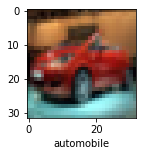

In [10]:
plot_sample(X_train,y_train,45)

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
ann = models.Sequential([
            layers.Flatten(input_shape = (32,32,3)),
            layers.Dense(1000,activation = 'relu'),
            layers.Dense(1000,activation= 'relu'),
            layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer = 'SGD',
      loss = 'sparse_categorical_crossentropy',
      metrics = ['accuracy']
)

ann.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 33s 21ms/step - loss: 1.8398 - accuracy: 0.3439
Epoch 2/5
1563/1563 [==============================] - 32s 21ms/step - loss: 1.6527 - accuracy: 0.4152
Epoch 3/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5693 - accuracy: 0.4444
Epoch 4/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5114 - accuracy: 0.4660
Epoch 5/5
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4622 - accuracy: 0.4845


In [13]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.4998 - accuracy: 0.4633


[1.4998319149017334, 0.4632999897003174]

In [14]:
from sklearn.metrics import confusion_matrix,classification_report

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification Report: \n', classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.54      0.50      1000
           1       0.48      0.69      0.57      1000
           2       0.43      0.25      0.32      1000
           3       0.38      0.28      0.32      1000
           4       0.49      0.32      0.39      1000
           5       0.39      0.38      0.38      1000
           6       0.48      0.57      0.52      1000
           7       0.61      0.45      0.52      1000
           8       0.42      0.78      0.55      1000
           9       0.55      0.37      0.44      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.45     10000
weighted avg       0.47      0.46      0.45     10000



In [33]:
cnn = models.Sequential([
                         
            #cnn
            layers.Conv2D(filters = 32, kernel_size  = (3,3),activation  ='relu',input_shape = (32,32,3)),
            layers.MaxPooling2D((2,2)),

            layers.Conv2D(filters = 64, kernel_size  = (3,3),activation  ='relu'),
            layers.MaxPooling2D((2,2)),
            #dense


            layers.Flatten(),
            
            layers.Dense(1000,activation= 'relu'),
            layers.Dense(10,activation='softmax')#softmax will normalize the probability.
            # for sigmoid if value is 0.45 and 0.67 and for softmax that value become to (0.45/(0.45+0.67)) and (0.67/(0.45 + 0.67)), sum of value is 1.
])

In [20]:
cnn.compile(optimizer = 'adam',
      loss = 'sparse_categorical_crossentropy',
      metrics = ['accuracy']
)

In [21]:
cnn.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 84s 53ms/step - loss: 1.3601 - accuracy: 0.5115
Epoch 2/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.9809 - accuracy: 0.6548
Epoch 3/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.7925 - accuracy: 0.7224
Epoch 4/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.6253 - accuracy: 0.7809
Epoch 5/10
1563/1563 [==============================] - 84s 53ms/step - loss: 0.4641 - accuracy: 0.8380
Epoch 6/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.3184 - accuracy: 0.8892
Epoch 7/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.2108 - accuracy: 0.9280
Epoch 8/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.1461 - accuracy: 0.9513
Epoch 9/10
1563/1563 [==============================] - 84s 54ms/step - loss: 0.1146 - accuracy: 0.9609
Epoch 10/10
1563/1563 [==============================] - 83s 53m

In [22]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 1.7002 - accuracy: 0.7031


[1.700196623802185, 0.7031000256538391]

In [23]:
y_test = y_test.reshape(-1, )

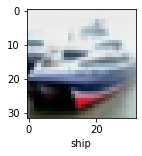

In [24]:
plot_sample(X_test,y_test,1)

In [25]:
y_pred  = cnn.predict(X_test)
y_pred[:1]

array([[2.0034999e-05, 1.7183097e-06, 3.6585470e-06, 4.4485647e-02,
        9.8929054e-10, 9.5545280e-01, 2.5214427e-05, 3.0448010e-07,
        1.0721089e-05, 2.0215851e-09]], dtype=float32)

In [26]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 0, 4]

In [27]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

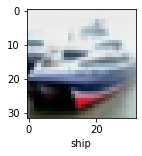

In [28]:
plot_sample(X_test,y_test,1)

In [29]:
classes[y_classes[1]]

'ship'

In [30]:
print('Classification Report : \n',classification_report(y_test,y_classes))

Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      1000
           1       0.85      0.76      0.80      1000
           2       0.73      0.48      0.58      1000
           3       0.48      0.56      0.52      1000
           4       0.69      0.64      0.66      1000
           5       0.61      0.60      0.60      1000
           6       0.76      0.81      0.79      1000
           7       0.76      0.78      0.77      1000
           8       0.85      0.74      0.79      1000
           9       0.68      0.87      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

